In [1]:
import pyrogue.utilities.fileio as fileio
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import struct
from scipy.stats import norm
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
top_level=f'{os.getcwd()}/..'

In [25]:
file_path = '/home/nomaru/work/BOR/20240308_035832_LERbcm.ascii'

# 数値を格納するリストを初期化
numbers = []

# ファイルを行ごとに読み取り、数値をリストに追加
with open(file_path, 'r') as file:
    for line in file:
        # 行末の改行文字を取り除いてから数値に変換し、リストに追加
        num=float(line.strip())
        if num>9:
            numbers.append(num)

# 数値が格納されたリストを表示
print(len(numbers))

bcm=numbers

57159


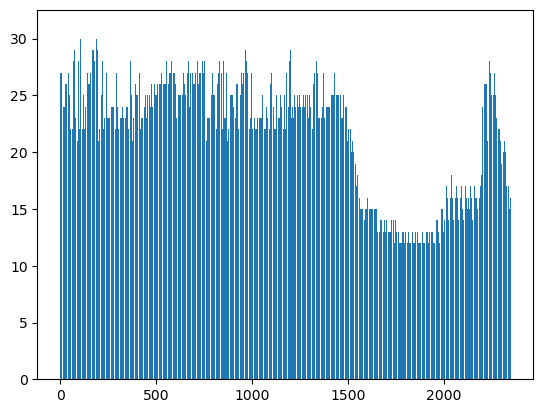

In [26]:
x=np.arange(783*3)
plt.bar(x,bcm[-783*3:])

plt.show()

In [31]:
bcm_turn=[]
for i in range(12):
    bcm_id=[]
    for j in range(783):
        bcm_id.append(bcm[-783*(12-i)+j])
    bcm_turn.append(np.array(bcm_id))
    
bcm_turn=np.array(bcm_turn)
    

In [40]:
file_path = '/home/nomaru/work/BOR/20240308_035837_LERver.ascii'

# 数値を格納するリストを初期化
numbers = []

# ファイルを行ごとに読み取り、数値をリストに追加
with open(file_path, 'r') as file:
    for line in file:
        # 行末の改行文字を取り除いてから数値に変換し、リストに追加
        num=float(line.strip())
        if num>145:
            numbers.append(num)

# 数値が格納されたリストを表示
print(len(numbers))

bor=numbers

22369


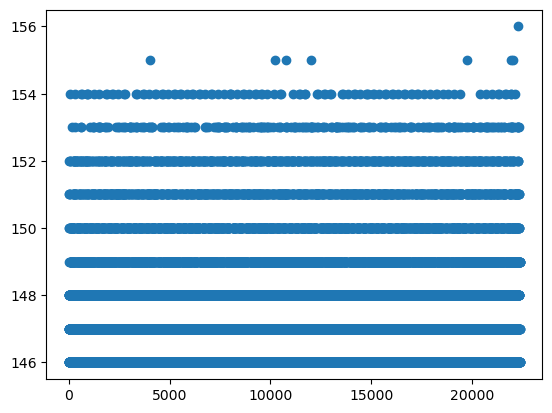

In [41]:
x=np.arange(len(bor))
plt.scatter(x,bor)

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(17,8))
split=np.hsplit(y_pos,y_pos.shape[1])
ax1.scatter(np.arange(0,y_pos.shape[0]*12)/y_pos.shape[0]+1,np.concatenate(split),color='red',s=10)
ax1.set_ylabel("Y position (mm)")
ax1.set_ylim(-2,2)
if normalize:
    ax1.set_ylim(-0.35,0.4)
#ax1.set_xlim(11.5,13)
ax1.grid()

split=np.hsplit(bcm_turn,bcm_turn.shape[1])
x=np.arange(0,bcm_turn.shape[0]*12)/bcm_turn.shape[0]+1
ax2.bar(x,np.concatenate(split).reshape(len(x)),width=1/len(bunch_index),color='black')
ax2.set_xlabel("Turn")
ax2.set_ylabel("Sum of 2 electrodes")
ax2.set_ylim(0,1.2)
ax2.grid()
#for i in range(12):
#    ax2.vlines(i+1,-2,2,color='black')
#ax2.hlines(1,1,13,color='black')
ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax2.set_xlim(lim,13)

plt.subplots_adjust(hspace=.0)
#plt.savefig("beamloss2.png",dpi=200)
plt.show()